100%|██████████| 10/10 [00:00<00:00, 3342.87it/s]


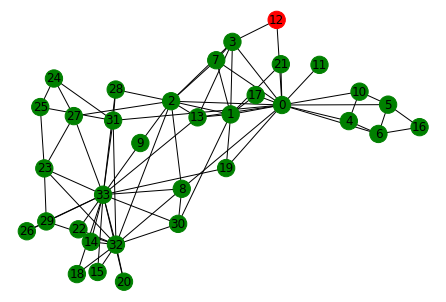

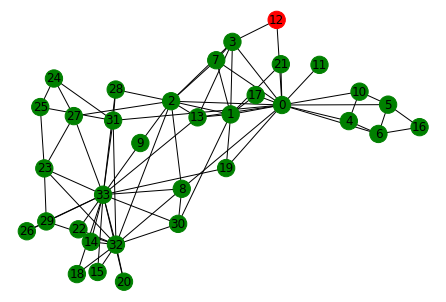

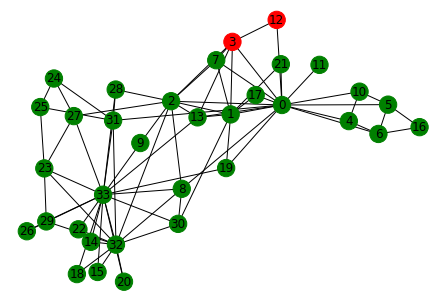

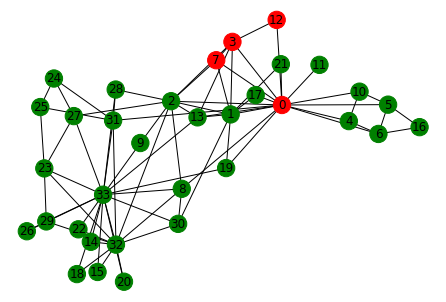

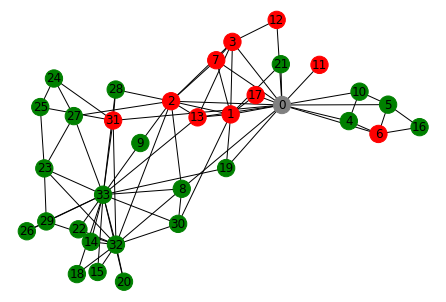

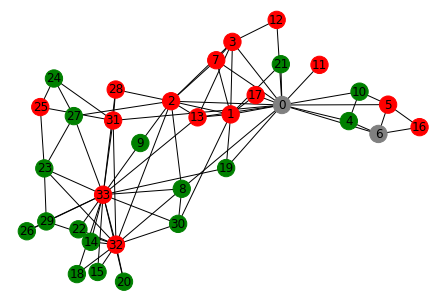

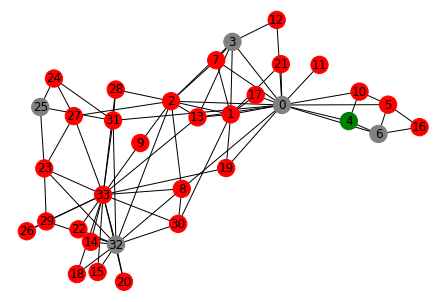

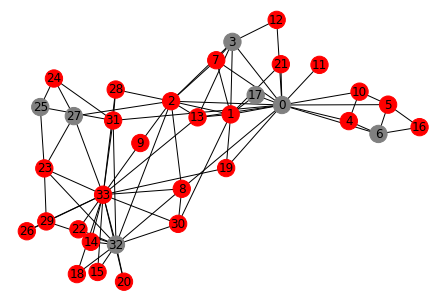

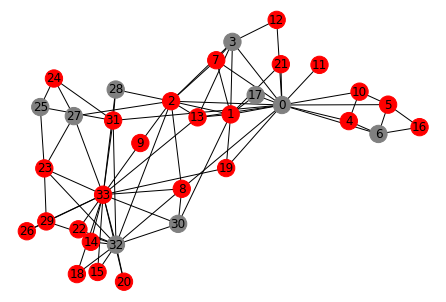

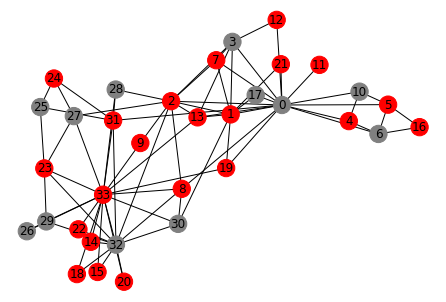

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from fa2l import force_atlas2_layout
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep


g = nx.karate_club_graph()

# Prepare node positions for output
positions = force_atlas2_layout(g,
                                iterations=1000,
                                pos_list=None,
                                node_masses=None,
                                outbound_attraction_distribution=False,
                                lin_log_mode=False,
                                prevent_overlapping=False,
                                edge_weight_influence=1.0,

                                jitter_tolerance=1.0,
                                barnes_hut_optimize=True,
                                barnes_hut_theta=0.5,

                                scaling_ratio=2.0,
                                strong_gravity_mode=False,
                                multithread=False,
                                gravity=1.0)

# Model selection
model = ep.SIRModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.5)
cfg.add_model_parameter('gamma', 0.1)
cfg.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(cfg)

number_of_iteration = 10
iterations = model.iteration_bunch(number_of_iteration)
x = 0

# Simulation execution
color_map = []
for iteration in range(g.number_of_nodes()):
    color_map.append('green')

for iteration in iterations:
    for index, status in iteration['status'].items():
        if status == 1:
            color_map[index] = 'red'
        if status == 2:
            color_map[index] = 'grey'

    ## nx.draw(g, node_color=color_map, with_labels=True)
    nx.draw(g, positions, node_color=color_map, with_labels=True)
    filename = 'output/iteration-{}.png'
    plt.show()
    x=+1
